In [12]:
import sir, sis, sirs, sirs_stats, branching
from importlib import reload
reload(sir)
reload(sis)
reload(sirs)
reload(sirs_stats)
reload(branching)

<module 'branching' from 'C:\\Users\\farid\\Documents\\Homework\\TIPE\\Code\\epidemics\\branching.py'>

# Exemples SIR
## Exemple de destruction rapide
Au bout d'une dizaine de tours, la population entière est consomée.

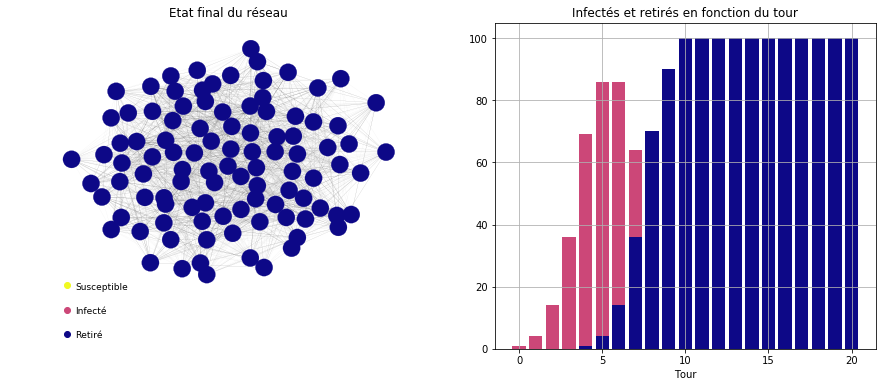

In [2]:
sir.plot(100, 3, 0.1, 20)

## Exemple d'étouffement
Au bout de quelques (4-5) tours, l'épidémie échoue à se reproduire.

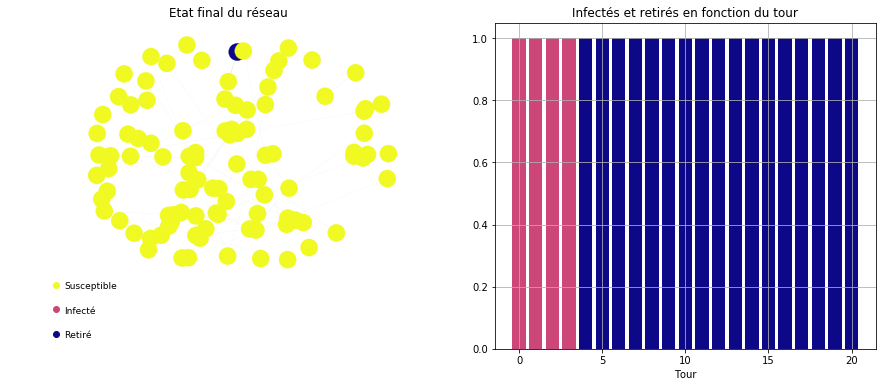

In [3]:
sir.plot(100, 3, 0.01, 20, density=0.01)

## Exemple de cas limite
Dépendant de l'execution, cette épidemie mourra ou survivera, et ne touchera jamais toute la population.

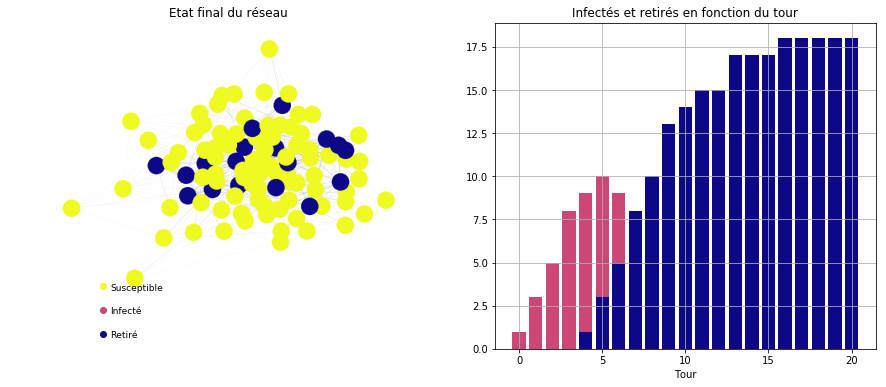

In [16]:
sir.plot(100, 3, 0.05, 20, density=0.07)

# Exemples d'oscillations SIRS
On peut obtenir des oscillations dans le modèle SIRS.

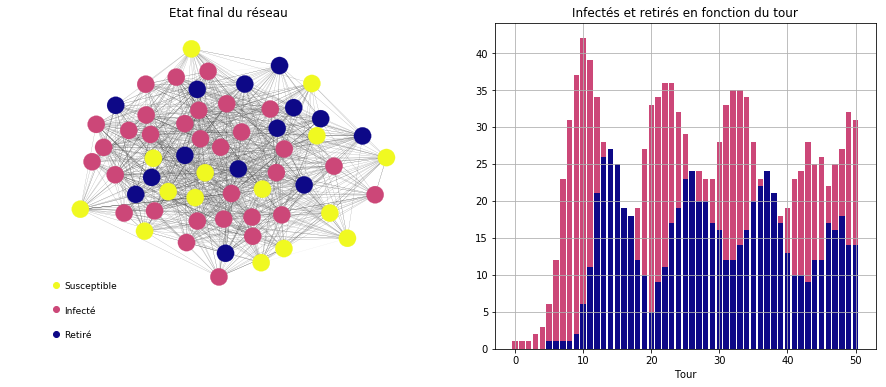

In [17]:
sirs.plot(turns=50)

Les oscillations sont suffisament aléatoires pour qu'en moyenne, elles s'annulent.

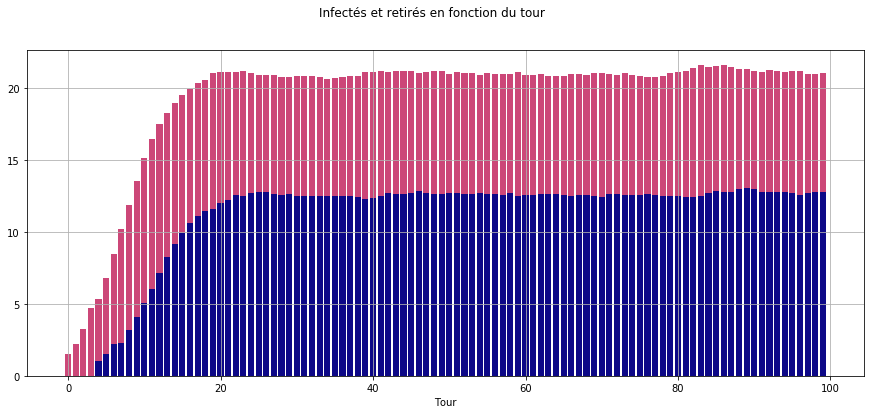

In [28]:
sirs_stats.plot_avg()

## Exemple de modèle d'arbre
L'arbre a deux comportements typiques, selon la valeur de R0.

**Etouffement**:

Vous allez générer 242 nodes, cela risque d'être long...


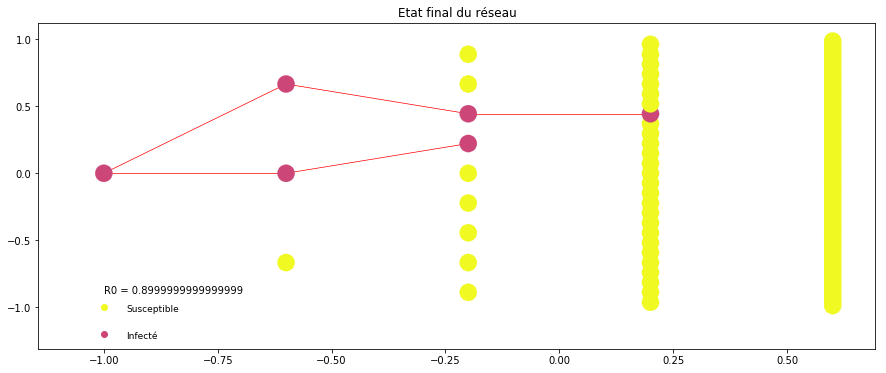

In [30]:
branching.plot(n=5, k=3, p=0.3)

**Survie et multipplication:**

Vous allez générer 242 nodes, cela risque d'être long...


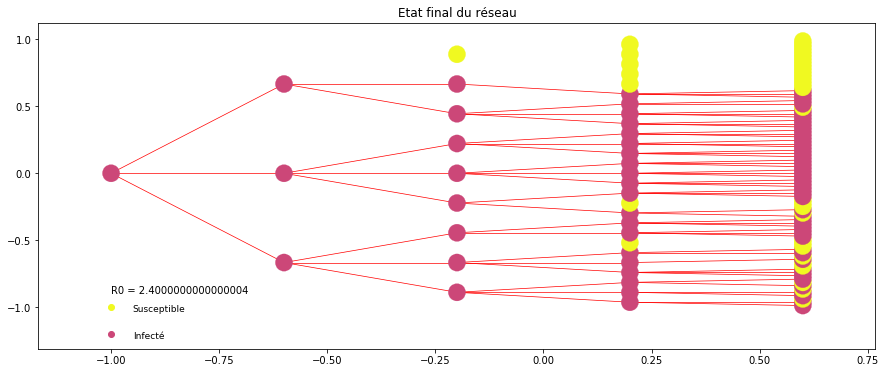

In [36]:
branching.plot(n=5, k=3, p=0.8)